In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

<h2>Percepton OR problem</h2>

In [ ]:
d_in = (2, )
model =  tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=d_in))
model.add(tf.keras.layers.Activation('sigmoid'))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.1))

In [15]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y = [0, 1, 1, 1]
history = model.fit(X, Y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0768
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0767
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0766
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0765
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0764
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0763
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0762
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0760
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0759
Epoch 10/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0758
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0757
Epoch 12/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0756
Epoch 13/500
1/1 [==============================] - 0s 5ms

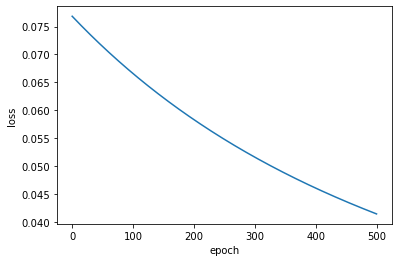

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [20]:
Z = model.predict(X)
print(tf.round(Z))

tf.Tensor(
[[0.]
 [1.]
 [1.]
 [1.]], shape=(4, 1), dtype=float32)


<h2 stlye="color: red;">Multilayers Percepton XOR problem</h2>

In [25]:
d_in = (2, )
model =  tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, input_shape=d_in))
model.add(tf.keras.layers.Activation('sigmoid'))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('sigmoid'))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
             optimizer=tf.keras.optimizers.SGD(learning_rate=1.5))

In [27]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y = [0, 1, 1, 0]
history_xor = model.fit(X, Y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0550
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0546
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0542
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0539
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0535
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0531
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0527
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0523
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0520
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0516
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0512
Epoch 12/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0509
Epoch 13/500
1/1 [==============================] - 0s 10ms

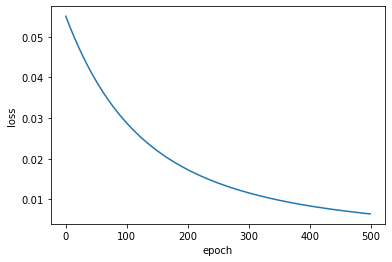

In [29]:
plt.plot(history_xor.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

<h1>linear Regession with gradient Tapes</h1>

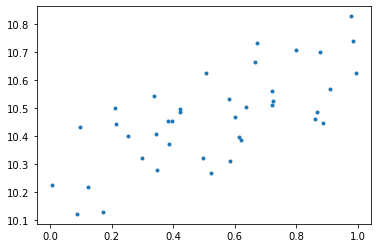

In [48]:
#Create data set
N = 40
x = np.random.rand(N)
y = 0.5 * x + 10 + 0.4 * np.random.rand(N)
plt.plot(x, y, ".")
plt.show()

<h3>linear Regession by Tensoflow</h3>

In [50]:
w = np.random.rand()
b = np.random.rand()

w = tf.Variable(w)
b = tf.Variable(b)
lr = 0.1

for epoch in range(1000):
    with tf.GradientTape() as t:
        Y = w * x + b
        loss = tf.reduce_mean(((y-Y)**2)) #mean square error
    dw, db = t.gradient(loss, (w, b))
    w.assign_sub(lr * dw) # w -=
    b.assign_sub(lr * db)
    print(epoch, w.numpy(), b.numpy(), loss.numpy())
                              

0 1.7767777 2.4313211 90.88183
1 2.5120966 3.8486338 50.3705
2 3.0435357 4.9040813 28.189777
3 3.424307 5.691775 16.039164
4 3.6937704 6.28133 9.376959
5 3.8810387 6.724243 5.718113
6 4.0076447 7.058606 3.7028916
7 4.0895157 7.3125973 2.5873013
8 4.1384306 7.5070605 1.9642464
9 4.163101 7.657416 1.6109765
10 4.16997 7.775069 1.4056034
11 4.1638017 7.8684597 1.2814289
12 4.148118 7.94383 1.2019521
13 4.1255236 8.005798 1.1471941
14 4.097943 8.057782 1.1062185
15 4.066798 8.10231 1.0730349
16 4.0331407 8.141253 1.0443598
17 3.9977455 8.175997 1.0183914
18 3.9611857 8.207565 0.9941376
19 3.923883 8.236718 0.97105086
20 3.8861485 8.264018 0.94882697
21 3.8482106 8.289881 0.927293
22 3.8102372 8.314616 0.9063503
23 3.772351 8.338453 0.8859398
24 3.7346416 8.361563 0.8660242
25 3.6971738 8.384071 0.8465786
26 3.6599944 8.406073 0.8275851
27 3.6231368 8.427638 0.809029
28 3.5866244 8.44882 0.7908983
29 3.5504732 8.469659 0.7731823
30 3.514694 8.490185 0.7558705
31 3.4792933 8.510421 0.7389534

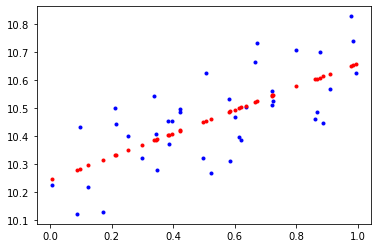

In [52]:
Z = w * x + b
plt.plot(x, y, ".b")
plt.plot(x, Z, ".r")
plt.savefig('re.png')
plt.show()
         

<h3>linear Regession by keras</h3>

Epoch 1/200
2/2 [==============================] - 0s 3ms/step - loss: 112.8074
Epoch 2/200
2/2 [==============================] - 0s 2ms/step - loss: 35.5535
Epoch 3/200
2/2 [==============================] - 0s 3ms/step - loss: 11.1749
Epoch 4/200
2/2 [==============================] - 0s 5ms/step - loss: 3.7911
Epoch 5/200
2/2 [==============================] - 0s 3ms/step - loss: 1.5852
Epoch 6/200
2/2 [==============================] - 0s 5ms/step - loss: 0.8864
Epoch 7/200
2/2 [==============================] - 0s 6ms/step - loss: 0.6320
Epoch 8/200
2/2 [==============================] - 0s 3ms/step - loss: 0.5269
Epoch 9/200
2/2 [==============================] - 0s 5ms/step - loss: 0.4808
Epoch 10/200
2/2 [==============================] - 0s 6ms/step - loss: 0.4621
Epoch 11/200
2/2 [==============================] - 0s 7ms/step - loss: 0.4450
Epoch 12/200
2/2 [==============================] - 0s 5ms/step - loss: 0.4234
Epoch 13/200
2/2 [==============================] - 0s 3m

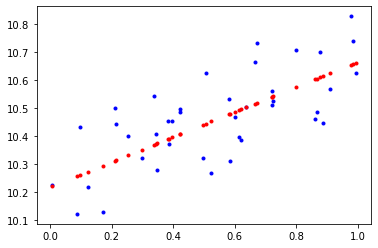

In [53]:
d_in = (1, )
model =  tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=d_in))
# model.add(tf.keras.layers.Activation('sigmoid'))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.1))
model.fit(x, y, epochs=200)
z = model.predict(x)
plt.plot(x, y, ".b")
plt.plot(x, z[:, 0], ".r")
plt.savefig('rekeras.png')
plt.show()